# **REsearch and methodology in Data Science**

## Static and Dynamic Hand Gestures
[source 1](https://zenodo.org/record/1319659#.X3OVgNgitQJ)

[source 2](https://www.researchgate.net/publication/330429917_Online_Recognition_of_Incomplete_Gesture_Data_to_Interface_Collaborative_Robots)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path = "/content/gdrive/My Drive/REDS/"

In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sn
import random
import statistics

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### 1ère partie : Analyse de données

In [ ]:
filename = "SG24_dataset.h5"
hf = h5py.File(data_path+filename,'r')

print("Keys :",hf.keys())

Keys : <KeysViewHDF5 ['Predictors', 'Target', 'User']>


In [ ]:
# data is now an ndarray.
predictors_data = hf['Predictors'][()].T
predictors_data_7captors = predictors_data[:,0:7]
predictors_data_22captors = predictors_data[:,7:]

target_data = hf['Target'][()].T.reshape(-1)

user_data =hf['User'][()].T.reshape(-1)

In [ ]:
user_data.shape

(2400,)

In [ ]:
target_data.shape

(2400,)

In [ ]:
predictors_data.shape

(2400, 29)

In [ ]:
predictors_data_7captors.shape

(2400, 7)

In [ ]:
predictors_data_22captors.shape

(2400, 22)

* Utilisation de la librairie Pandas

In [ ]:
df = pd.DataFrame(predictors_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.145442,0.0,-0.989367,0.0,77.0,67.0,74.0,94.0,165.0,82.0,68.0,79.0,138.0,72.0,97.0,106.0,132.0,77.0,91.0,96.0,0.0,83.0,33.0,136.0,140.0,143.0
1,0.0,0.0,0.0,0.195537,0.0,-0.980696,0.0,20.0,131.0,127.0,144.0,63.0,56.0,83.0,48.0,53.0,101.0,128.0,70.0,58.0,93.0,119.0,64.0,82.0,105.0,119.0,79.0,103.0,82.0
2,0.0,0.0,0.0,0.294340,0.0,-0.955701,0.0,22.0,139.0,134.0,125.0,76.0,68.0,81.0,56.0,61.0,96.0,141.0,75.0,59.0,87.0,130.0,68.0,86.0,106.0,131.0,75.0,105.0,89.0
3,0.0,0.0,0.0,0.352911,0.0,-0.935657,0.0,7.0,135.0,137.0,158.0,70.0,68.0,82.0,61.0,57.0,97.0,161.0,79.0,59.0,85.0,137.0,69.0,87.0,106.0,132.0,76.0,114.0,75.0
4,0.0,0.0,0.0,0.318924,0.0,-0.947780,0.0,123.0,164.0,69.0,56.0,82.0,52.0,57.0,96.0,124.0,70.0,60.0,83.0,124.0,64.0,80.0,105.0,120.0,67.0,115.0,80.0,0.0,83.0


* Description statistique des données

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,53.669293,-5.698329,0.203902,0.491011,-0.140472,0.164828,-0.149610,129.851667,137.503750,145.390833,99.894583,103.697083,90.632500,92.763750,98.470000,102.806667,105.589167,105.263750,106.814583,110.054167,82.854167,103.005417,91.606667,143.834167,109.237083,120.668750,82.562500,137.099167,83.047500
std,41.520634,32.720964,22.393903,0.249192,0.281654,0.690302,0.268272,32.298842,15.895186,31.776834,41.527013,36.395257,58.266803,20.785061,41.988227,56.366714,23.180454,54.492987,28.088027,46.031646,20.323427,45.260604,22.685341,53.253552,17.291823,29.802893,48.056139,21.926745,30.394479
min,0.000000,-81.559349,-68.739662,0.000000,-0.855817,-1.000000,-0.789427,1.000000,44.000000,36.000000,27.000000,6.000000,7.000000,21.000000,1.000000,1.000000,4.000000,1.000000,27.000000,0.000000,1.000000,1.000000,25.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,-26.450032,-15.801244,0.314152,-0.387735,-0.846747,-0.360048,122.000000,128.000000,121.750000,69.000000,77.000000,47.000000,82.000000,64.000000,49.000000,92.000000,67.750000,85.000000,63.000000,71.000000,79.000000,75.000000,92.000000,105.000000,104.000000,49.000000,131.000000,64.000000
50%,70.621365,0.000000,0.000000,0.555695,0.000000,0.471377,-0.062433,128.000000,135.000000,152.000000,85.000000,94.000000,63.000000,87.000000,91.000000,83.000000,99.000000,118.000000,106.000000,132.000000,81.000000,114.000000,92.000000,159.000000,106.000000,126.000000,86.000000,141.000000,78.000000
75%,84.528341,0.000000,17.166466,0.691598,0.000000,0.629917,0.000000,134.000000,143.000000,170.000000,122.000000,131.000000,140.000000,95.000000,138.000000,162.000000,112.000000,147.000000,133.000000,151.000000,93.000000,134.000000,111.000000,192.000000,107.000000,142.000000,116.000000,149.000000,101.000000
max,127.721718,78.185921,59.903419,0.955188,0.727471,1.000000,0.782390,238.000000,206.000000,207.000000,245.000000,230.000000,225.000000,216.000000,190.000000,216.000000,210.000000,234.000000,167.000000,179.000000,170.000000,218.000000,229.000000,248.000000,255.000000,189.000000,216.000000,192.000000,193.000000




---



## 2eme partie : Protocol expérimental 

**Objectifs :**

* "base line" => pas optimisé, variable intéressante 

* score, modèle simple (knn, randomforest,svm) en respectant le protocole expérimental.
* feature engineering
* comparaison modèle
* optimisation hyperparamètre
* nouvelles contributions

In [ ]:
dummy = DummyClassifier(strategy="uniform", random_state=42, constant=24)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(decision_function_shape='ovo')
mlp = MLPClassifier()

In [ ]:
n_split = 5
sss = StratifiedShuffleSplit(n_splits=n_split, test_size=0.3, random_state=42)

## Création des différents datasets à tester
* X en considérant tous les capteurs
* X en considérant tous les capteurs (scalé)
* X en considérant les 7 premiers capteurs
* X en considérant les 22 autres capteurs restants

#### Feature selection

In [ ]:
X = df.to_numpy()
y = target_data

# Plusieurs dataset à tester
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

X_7captors = predictors_data_7captors
X_22captors = predictors_data_22captors

#### Feature Importance

29
[0.00519749 0.00450029 0.00917529 0.01437266 0.02421129 0.01472722
 0.0112785  0.04215671 0.03500903 0.05606731 0.05652645 0.04487026
 0.07876711 0.02493436 0.04079905 0.07231666 0.01853641 0.0760175
 0.03308573 0.07576902 0.01000016 0.0465054  0.0446397  0.08331608
 0.00456887 0.02387354 0.01490793 0.02414672 0.00972326]


Text(0, 0.5, 'Gini Importance')

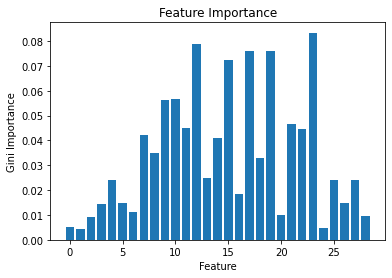

In [ ]:
random_forest.fit(X,y)
print(random_forest.n_features_)
print(random_forest.feature_importances_)
plt.bar(np.arange(29),random_forest.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Gini Importance")

# Base Line Machine Learning

In [ ]:
good_pred = 0
for row in range(X.shape[0]) :
  r = random.randint(1,24)
  if y[row] == r :
    good_pred += 1
print("Score accuracy", good_pred / X.shape[0])
print(np.unique(y))

Score accuracy 0.041666666666666664
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [ ]:
acc_cv = cross_val_score(dummy, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=>",acc_cv.mean())

Accuracy Score (KFold=5) => [0.04305556 0.05277778 0.04027778 0.03055556 0.04444444] => 0.042222222222222223


### Modèle simple : DummyClassifier selon différentes stratégies simples

lien = https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [ ]:
strategies = ["stratified","most_frequent","prior","uniform","constant"]
for strat in strategies:
  dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=2)
  dummy_clf.fit(X, y)
  print(dummy_clf.predict(X))
  print(strat, dummy_clf.score(X, y))

[ 9 12  7 ... 14  1 20]
stratified 0.04083333333333333
[1 1 1 ... 1 1 1]
most_frequent 0.041666666666666664
[1 1 1 ... 1 1 1]
prior 0.041666666666666664
[13 16 22 ...  5  5 14]
uniform 0.04541666666666667
[2 2 2 ... 2 2 2]
constant 0.041666666666666664


In [ ]:
accuracy_dummy_cv = []
strategies = ["stratified","most_frequent","prior","uniform","constant"]

for strat in strategies :
  tmp = 0.0
  for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=1)
    dummy_clf.fit(X_train, y_train)

    tmp += dummy_clf.score(X_test, y_test)

  print(strat," : ", tmp/n_split)

stratified  :  0.04222222222222223
most_frequent  :  0.041666666666666664
prior  :  0.041666666666666664
uniform  :  0.04083333333333333
constant  :  0.041666666666666664


### Modèle SVM

In [ ]:
acc_cv = cross_val_score(svm, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(svm, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(svm, X_7captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())#,roc_auc_score(y_true, y_scores))

acc_cv = cross_val_score(svm, X_22captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.91111111 0.91944444 0.92916667 0.91666667 0.91527778] => 0.918
Accuracy Score (KFold=5) => [0.93888889 0.95833333 0.95694444 0.95555556 0.95277778] => 0.953
Accuracy Score (KFold=5) => [0.06805556 0.05       0.07083333 0.05555556 0.05833333] => 0.061
Accuracy Score (KFold=5) => [0.91388889 0.93472222 0.94027778 0.93888889 0.93611111] => 0.933


Recherche des meilleurs hyper-parammètres + crossval : *GridSearchCV*

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear', 'poly', 'sigmoid'],
              'max_iter': [5000]}  
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, verbose=1, n_jobs=-1, cv= sss)

In [ ]:
CV_svm.fit(X, y)
print(CV_svm.best_params_)
acc_cv = cross_val_score(CV_svm.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_svm.fit(X_scale, y)
print(CV_svm.best_params_)
acc_cv = cross_val_score(CV_svm.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

In [ ]:
CV_svm.fit(X_7captors, y)
print(CV_svm.best_params_)
acc_cv = cross_val_score(CV_svm.best_estimator_, X_7captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_svm.fit(X_22captors, y)
print(CV_svm.best_params_)
acc_cv = cross_val_score(CV_svm.best_estimator_, X_22captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'C': 10, 'gamma': 1, 'kernel': 'poly', 'max_iter': 5000}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_

Accuracy Score (KFold=5) => [0.1375     0.15       0.12777778 0.15833333 0.10833333] => 0.136
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 5000}
Accuracy Score (KFold=5) => [0.93611111 0.95277778 0.95972222 0.95833333 0.95555556] => 0.953


## Modèle simple ensembliste : KNN

In [ ]:
acc_cv = cross_val_score(knn, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(knn, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(knn, X_7captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f, auc_roc=>"%acc_cv.mean())#,roc_auc_score(y_true, y_scores))

acc_cv = cross_val_score(knn, X_22captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.91666667 0.91805556 0.92638889 0.9125     0.91111111] => 0.917
Accuracy Score (KFold=5) => [0.89722222 0.9        0.91388889 0.92083333 0.89305556] => 0.905
Accuracy Score (KFold=5) => [0.10694444 0.12361111 0.125      0.10833333 0.12777778] => 0.118, auc_roc=>
Accuracy Score (KFold=5) => [0.9125     0.92361111 0.93194444 0.925      0.92361111] => 0.923


Recherche des meilleurs hyper-parammètres + crossval : *GridSearchCV*

In [ ]:
param_grid_knn = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidian', 'manhattan', 'minkowski']
}
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, verbose=1, n_jobs=-1, cv= sss)

In [ ]:
CV_knn.fit(X, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_knn.fit(X_scale, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_knn.fit(X_7captors, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_7captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_knn.fit(X_22captors, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_22captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.0s finished


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.92638889 0.93888889 0.94305556 0.92638889 0.93333333] => 0.934
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.6s finished


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.93333333 0.92777778 0.93888889 0.94166667 0.9375    ] => 0.936
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.11944444 0.10694444 0.14444444 0.11527778 0.13194444] => 0.124
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.2s finished


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.92638889 0.94305556 0.94305556 0.92222222 0.92916667] => 0.933


In [ ]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.9327777777777779


## Modèle simple ensembliste : Random Forest

In [ ]:
acc_cv = cross_val_score(random_forest, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_7captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_22captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.94166667 0.95416667 0.96111111 0.95972222 0.96527778] => 0.9564
Accuracy Score (KFold=5) => [0.94027778 0.95416667 0.96111111 0.95972222 0.96527778] => 0.9561
Accuracy Score (KFold=5) => [0.17638889 0.19305556 0.19444444 0.18055556 0.21388889] => 0.1917
Accuracy Score (KFold=5) => [0.93194444 0.94861111 0.95138889 0.94861111 0.95555556] => 0.9472


Recherche des meilleurs hyper-parammètres + crossval : *RandomizedSearchCV*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt', "log2"]
# Number of trees in random forest
n_estimators = [100, 300, 500, 800, 1200]
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, 30, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10] 

random_grid = {'max_features': max_features,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf
               }

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = sss, verbose=1, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

rf_random.fit(X_scale, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

rf_random.fit(X_7captors, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_7captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

rf_random.fit(X_22captors, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_22captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 17.1min finished


{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 15}
Accuracy Score (KFold=5) => [0.94583333 0.96111111 0.96111111 0.95972222 0.96527778] => 0.959
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 17.1min finished


{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 15}
Accuracy Score (KFold=5) => [0.94583333 0.96111111 0.96111111 0.95833333 0.96527778] => 0.958
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.5s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 16.1min finished


{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 30}
Accuracy Score (KFold=5) => [0.18333333 0.18888889 0.19166667 0.18055556 0.21388889] => 0.192
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 14.8min finished


{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 25}
Accuracy Score (KFold=5) => [0.93194444 0.94861111 0.95138889 0.94861111 0.95694444] => 0.948


# Protocole expérimental : Custom Cross Validation


In [ ]:
def split_x_y(users, input, output) :
    ids = np.where(user_data == users[0])[0]
    for i in range(1,len(users)) :
        ids = np.concatenate((ids,np.where(user_data == users[i])[0]))
    return input[ids], output[ids] 

In [ ]:
t = (1,2)
set(range(1,9)) - {t[0],t[1]}

{3, 4, 5, 6, 7, 8}

In [ ]:
def custom_crossvalidation(model, dataX, dataY, type_fold) :
  set_users = set(range(1,9))
  users = list(range(1,9))
  if type_fold == "singleton" :
    list_users = users
  else : 
    list_users = [(users[p1], users[p2]) for p1 in range(len(users)) for p2 in range(p1+1,len(users))]

  score_custom_crossval = []

  for u in list_users :
    if type_fold == "singleton" :
      train_x, train_y = split_x_y(list(set_users - {u}), dataX, dataY)
      test_x, test_y = split_x_y([u], dataX, dataY)
      print("Train user : ", set_users - {u}, "Test user : ", u)
      print(train_x.shape,train_y.shape, test_x.shape, test_y.shape)
    else :
      train_x, train_y = split_x_y(list(set_users - {u[0],u[1]}), dataX, dataY)
      test_x, test_y = split_x_y(u, dataX, dataY)
      print("Train user : ", set_users - {u[0],u[1]}, "Test user : ", u)

    model.fit(train_x,train_y)

    s = model.score(test_x, test_y)
    print("Score = ",s)

    score_custom_crossval.append(s)


  return sum(score_custom_crossval)/len(score_custom_crossval)

### **Custom Cross validation** : 7 users train // 1 user test

In [ ]:
print(custom_crossvalidation(RandomForestClassifier(random_state=42,n_estimators=300,max_depth=15),X,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.8683333333333333
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.9083333333333333
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(2040, 29) (2040,) (360, 29) (360,)
Score =  0.9111111111111111
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.95
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.9375
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.975
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.925
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.925
0.9250347222222222


In [ ]:
print(custom_crossvalidation(RandomForestClassifier(random_state=42,n_estimators=300,max_depth=15),X,y,"pair"))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)
Score =  0.8058333333333333
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)
Score =  0.878125
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)
Score =  0.8797619047619047
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)
Score =  0.888095238095238
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)
Score =  0.8861111111111111
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)
Score =  0.875
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)
Score =  0.875
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)
Score =  0.9229166666666667
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)
Score =  0.9345238095238095
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)
Score =  0.925
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)
Score =  0.9236111111111112
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)
Score =  0.9069444444444444
Train user :  {1, 3, 4, 5, 6, 7} Test user :  (2, 8)
Score =  0.90555555555555

In [ ]:
print(custom_crossvalidation(random_forest,X,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.87
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.9133333333333333
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(2040, 29) (2040,) (360, 29) (360,)
Score =  0.9194444444444444
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.95
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.9416666666666667
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9583333333333334
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.925
0.9263888888888888


In [ ]:
print(custom_crossvalidation(random_forest,X,y,"pair"))

In [ ]:
print(custom_crossvalidation(DecisionTreeClassifier(max_depth=10),X,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.7483333333333333
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.83
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(2040, 29) (2040,) (360, 29) (360,)
Score =  0.8333333333333334
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.8958333333333334
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.7833333333333333
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.875
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.7083333333333334
0.8259375


In [ ]:
print(custom_crossvalidation(mlp,X_scale,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8033333333333333
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.855
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.7166666666666667
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.5541666666666667
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.6083333333333333
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.7416666666666667
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.4583333333333333
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
Score =  0.575
0.6640625


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Custom Cross validation**  : 6 users train // 2 user test

source pour faire les paires : https://stackoverflow.com/questions/942543/operation-on-every-pair-of-element-in-a-list

In [ ]:
print(custom_crossvalidation(random_forest,X,y,"pair"))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)
Score =  0.8
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)
Score =  0.8760416666666667
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)
Score =  0.8714285714285714
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)
Score =  0.888095238095238
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)
Score =  0.8916666666666667
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)
Score =  0.8708333333333333
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)
Score =  0.8763888888888889
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)
Score =  0.9229166666666667
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)
Score =  0.9369047619047619
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)
Score =  0.919047619047619
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)
Score =  0.9277777777777778
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)
Score =  0.9180555555555555
Train user :  {1, 3, 4, 5, 6, 7} Test user : 

In [ ]:
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid_knn = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidian', 'manhattan', 'minkowski']
}

In [ ]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, verbose=1, n_jobs=-1, cv= sss)
CV_knn.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.7s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidian', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
CV_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
print(custom_crossvalidation(CV_knn.best_estimator_,X,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.8316666666666667
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.8816666666666667
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(2040, 29) (2040,) (360, 29) (360,)
Score =  0.875
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.9291666666666667
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.8625
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9416666666666667
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.825
0.8808333333333334


In [ ]:
CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,verbose=1, n_jobs=-1, cv= sss)
CV_rfc.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.5min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1...
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_st

In [ ]:
print(custom_crossvalidation(CV_rfc.best_estimator_,X,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.8666666666666667
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(1800, 29) (1800,) (600, 29) (600,)
Score =  0.9216666666666666
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(2040, 29) (2040,) (360, 29) (360,)
Score =  0.9138888888888889
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.95
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(2160, 29) (2160,) (240, 29) (240,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.975
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(2280, 29) (2280,) (120, 29) (120,)
Score =  0.9166666666666666
0.9263194444444445


In [ ]:
CV_rfc.best_score_

0.9555555555555555